# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [236]:
import pandas as pd
import numpy as np
import functools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('twitter-archive-enhanced.csv')

In [136]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [137]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [138]:
#Load image predictions CSV into DataFrame df_image
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**Note:** Twitter Developer Account failed to create. Downloaded directly from Udacity: https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

Load the tweet_json.txt into a DataFrame **df_tweets**

In [139]:
import json
count = 0
df_json = []

with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        count += 1
        file = json_file.readline()
        data = json.loads(file)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        df_json.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                       'favorite_count': favorite_count})
        
        df_tweets = pd.DataFrame(df_json, columns = ['tweet_id', 'retweet_count', 'favorite_count' ])

In [140]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467
...,...,...,...
1172,666057090499244032,146,304
1173,666051853826850816,879,1253
1174,666049248165822465,41,111
1175,666033412701032449,47,128


## Assessing Data
**Eight (8) quality issues and two (2) tidiness issue**. Will use **both** visual assessment
programmatic assessement to assess the data.


In [141]:
#Check datatypes, missing values for the twitter archive data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [142]:
#Check datatypes, missing values for the tweet json data
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1177 non-null   int64
 1   retweet_count   1177 non-null   int64
 2   favorite_count  1177 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [143]:
#Check datatypes, missing values for the image prediction data
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
#Check unique values for rating denominator
df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [145]:
#Check unique values for rating numerator
df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [146]:
#check unique sources
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [30]:
#check unique names
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [147]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [148]:
#check how dog stages have been captured
df[['doggo', 'floofer', 'pupper', 'puppo']].sample(20)

,doggo,floofer,pupper,puppo
1748,None,None,None,None
814,None,None,None,None
2071,None,None,None,None
1302,None,None,None,None
163,None,None,None,None
1077,None,None,None,None
1167,None,None,None,None
949,None,None,None,None
2251,None,None,None,None
2141,None,None,None,None


In [149]:
#A glimpse image prediction data
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issues
1. Erroneous datatypes in columns (timestamp, retweeted_status_timestamp)

2. Null values recorded as None and NaN - Harmonize to NaN

3. Rename column timestamp to tweet_date

4. Rename column text to tweet_remarks

5. Rating denominator should not be 0 (zero).

6. Extract source from contents in source column(HTML CODE) and rename column to source_extract

7. Create a new column 'Dog Stage' and merge the dog stages into it.

8. Create new column **breed_name** after getting one with highest confidence, then drop other columns.

9. Clean Breed Names created in Issue 8. Remove '_'  and all names to be in lower case

### Tidiness issues
1. Merging all the three tables.

2. Drop unnecessary columns in merged table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [150]:
# Copies of original pieces of data
df_clean = df.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

In [151]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [152]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [153]:
df_tweets_clean.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467


### Issue #1: Erroneous datatypes in columns (timestamp, retweeted_status_timestamp)

#### Define:
Changed the following columns: 
* timestamp from object to datetime
* retweeted_status_timestamp from object to datetime

### Code

In [154]:
df_clean['timestamp']= pd.to_datetime(df_clean['timestamp'])
df_clean['retweeted_status_timestamp']= pd.to_datetime(df_clean['retweeted_status_timestamp'])

#### Test

In [155]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Merging all the three tables. (Tidiness Issues)

#### Define: 
Merge Tables using OUTER and create a copy

### Code

In [156]:
df_all = pd.merge(df_clean, df_tweets_clean, on = "tweet_id", how = "outer")
df_all = pd.merge(df_all, df_image_clean, on = "tweet_id", how = "outer")

#### Test

In [157]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [158]:
# Make a copy of df_all
df_all_copy = df_all.copy()

### A copy of df_all

In [159]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Null values recorded as None and NaN - Harmonize to NaN (Quality Issues)

#### Define: 
Replace all None values with Nan

#### Code

In [160]:
df_all_copy.replace('None', np.nan, inplace=True)

#### Test

In [161]:
df_all_copy.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Issue #3: Rename column timestamp to tweet_date 

#### Define: 
Use rename function

#### Code

In [162]:
df_all_copy.rename(columns = {'timestamp':'tweet_date'}, inplace = True)

#### Test

In [163]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   tweet_date                  2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #4: Rename column text to tweet_remarks

#### Define: 
Use rename function

#### Code

In [164]:
df_all_copy.rename(columns = {'text':'tweet_remarks'}, inplace = True)

#### Test

In [165]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   tweet_date                  2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   tweet_remarks               2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5: Rating denominator should not be 0 (zero)

#### Define: 
Use query function to query all denominators equal to zero

In [263]:
df_all_copy[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [270]:
df_all_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### Code

In [272]:
#clean the records with denominators equal to zero

df_all_copy['rating_denominator'].mask(df_all_copy['rating_denominator'] ==0 , 10, inplace=True)

#### Test

In [273]:
df_all_copy.rating_denominator.value_counts()

10     2334
11        3
50        3
20        2
80        2
7         1
70        1
150       1
170       1
15        1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### Issue #6: Extract source from contents in source column(HTML CODE) and rename column to source_extract 

#### Define: 
Use replace function to replace URL with the data extracted

#### Code

In [167]:
df_all_copy.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace=True)
df_all_copy.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace=True)
df_all_copy.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene', inplace=True)
df_all_copy.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)

#### Test

In [168]:
df_all_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'Tweetdeck'], dtype=object)

### Issue #7: Create a new column 'Dog Stage' and merge the dog stages into it. 

#### Define
Merge doggo, floofer, pupper, puppo into dog_stage

#### Code

In [169]:
#Sample the dog stages
df_all_copy[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
387,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN
1413,NaN,NaN,NaN,NaN
409,NaN,NaN,NaN,NaN
815,NaN,NaN,pupper,NaN
482,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN
455,NaN,NaN,NaN,NaN
1157,NaN,NaN,pupper,NaN


In [192]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   tweet_date                  2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   tweet_remarks               2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [194]:
#check column position

col_loc = df_all_copy.columns.get_loc('doggo')
col_loc

13

In [205]:
# Copy 'doggo', 'floofer', 'pupper', 'puppo' into dog_stage
df_all_copy['dog_stage'] = df_all_copy.iloc[:,col_loc:col_loc+4].apply(lambda x: ",".join(x.astype(str)), axis=1)

In [241]:
#Check data migrated
df_all_copy.dog_stage.value_counts()

nan,nan,nan,nan          1976
nan,nan,pupper,nan        245
doggo,nan,nan,nan          83
nan,nan,nan,puppo          29
doggo,nan,pupper,nan       12
nan,floofer,nan,nan         9
doggo,nan,nan,puppo         1
doggo,floofer,nan,nan       1
Name: dog_stage, dtype: int64

In [242]:
df_all_copy.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,tweet_remarks,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,breed_name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,"nan,nan,nan,nan"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,"nan,nan,nan,nan"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,"nan,nan,nan,nan"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador retriever,"nan,nan,nan,nan"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,"nan,nan,nan,nan"


In [243]:
#Clean up nan,nan,nan,nan
df_all_copy.dog_stage = df_all_copy.dog_stage.replace('nan,nan,nan,nan', 'nan')

In [245]:
#Clean up Dog stages

df_all_copy.dog_stage = df_all_copy.dog_stage.replace('nan,nan,pupper,nan', 'pupper')
df_all_copy.dog_stage = df_all_copy.dog_stage.replace('doggo,nan,nan,nan', 'doggo')
df_all_copy.dog_stage = df_all_copy.dog_stage.replace('nan,nan,nan,puppo', 'puppo')

In [249]:
df_all_copy.dog_stage = df_all_copy.dog_stage.replace('nan,floofer,nan,nan', 'floofer')

In [250]:
#Confirm Clean up

df_all_copy.dog_stage.value_counts()

nan                      1976
pupper                    245
doggo                      83
puppo                      29
doggo,nan,pupper,nan       12
floofer                     9
doggo,nan,nan,puppo         1
doggo,floofer,nan,nan       1
Name: dog_stage, dtype: int64

### Issue #8: Create new column **breed_name** after getting one with highest confidence, then drop other columns 

In [171]:
def breed_extract(row):
    breed_confidence = 0
    breed_name = ''
    is_breed = False
    
    if(row.p1_dog == True):
        if(row.p1_conf >= breed_confidence):
            breed_confidence = row.p1_conf
            breed_name = row.p1
            is_breed = True
            
    if(row.p2_dog == True):
        if(row.p2_conf >= breed_confidence):
            breed_confidence = row.p2_conf
            breed_name = row.p2
            is_breed = True
            
    if(row.p3_dog == True):
        if(row.p2_conf >= breed_confidence):
            breed_confidence = row.p3_conf
            breed_name = row.p3
            is_breed = True
            
    if is_breed == False:
        return np.nan
    
    else:
        return breed_name

In [172]:
df_all_copy['breed_name'] = df_all_copy.apply(breed_extract,axis=1)

In [175]:
df_all_copy.breed_name.value_counts()

golden_retriever      165
Labrador_retriever    116
Pembroke               95
Chihuahua              92
pug                    65
                     ... 
standard_schnauzer      1
silky_terrier           1
Scotch_terrier          1
clumber                 1
Irish_wolfhound         1
Name: breed_name, Length: 113, dtype: int64

In [176]:
df_all_copy.breed_name.unique()

array([nan, 'Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'Irish_setter', 'bloodhound',
       'Bernese_mountain_dog', 'West_Highland_white_terrier',
       'cocker_spaniel', 'flat-coated_retriever', 'Cardigan',
       'Newfoundland', 'dalmatian', 'Shetland_sheepdog', 'komondor',
       'kelpie', 'Greater_Swiss_Mountain_dog', 'Border_collie',
       'bull_mastiff', 'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bouvier_des_Flandres', 'Bedlington_terrier',
       'Boston_bull', 'Old_English_shee

#### Issue #9: Clean Breed Names created in Issue 8. Remove '_'  and all names to be in lower case

#### Define
Clean data collected in issue 8

In [180]:
df_all_copy.breed_name = df_all_copy.breed_name.str.replace("_"," ")
df_all_copy.breed_name = df_all_copy.breed_name.str.lower()

#### Test

In [182]:
df_all_copy.breed_name.unique()

array([nan, 'chihuahua', 'labrador retriever', 'basset',
       'chesapeake bay retriever', 'appenzeller', 'pomeranian',
       'irish terrier', 'pembroke', 'samoyed', 'french bulldog',
       'golden retriever', 'whippet', 'siberian husky',
       'mexican hairless', 'kuvasz', 'pug', 'blenheim spaniel',
       'malamute', 'italian greyhound', 'chow', 'german shepherd',
       'doberman', 'eskimo dog', 'weimaraner', 'saluki',
       'miniature pinscher', 'german short-haired pointer',
       'english springer', 'vizsla', 'irish setter', 'bloodhound',
       'bernese mountain dog', 'west highland white terrier',
       'cocker spaniel', 'flat-coated retriever', 'cardigan',
       'newfoundland', 'dalmatian', 'shetland sheepdog', 'komondor',
       'kelpie', 'greater swiss mountain dog', 'border collie',
       'bull mastiff', 'staffordshire bullterrier', 'lakeland terrier',
       'australian terrier', 'bouvier des flandres', 'bedlington terrier',
       'boston bull', 'old english shee

### Issue #2: Drop unnecessary columns in merged table (Tidiness)

#### Define 

Drop uninterested columns in archive_copy dataframe : retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id



#### Code

In [177]:
# Drop Columns from #issue 8 --- 'p1','p1_dog','p1_conf','p2','p2_conf','p2_dog','p3','p3_dog','p3_conf'

df_all_copy.drop(columns=['p1','p1_dog','p1_conf','p2','p2_conf','p2_dog','p3','p3_dog','p3_conf'],inplace=True)


In [255]:
#Drop columns 'doggo','floofer','pupper','puppo'
df_all_copy.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

In [256]:
df_all_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   tweet_date                  2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   tweet_remarks               2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [274]:
# Save changes
df_all_copy.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
**Three (3) insights and one (1) visualization.**

### Insights

#### 1. Favorite Count is More compared to Retweet Count!

In [229]:
retweet_vs_favorite = df_all_copy.groupby('breed_name').agg({'retweet_count': "sum", 'favorite_count': "sum"}).reset_index()

retweet_vs_favorite

,breed_name,retweet_count,favorite_count
0,afghan hound,5312.0,17305.0
1,airedale,11716.0,45507.0
2,american staffordshire terrier,22392.0,84648.0
3,appenzeller,758.0,2594.0
4,australian terrier,700.0,2244.0
...,...,...,...
108,welsh springer spaniel,3976.0,18811.0
109,west highland white terrier,6613.0,31115.0
110,whippet,19986.0,69958.0
111,wire-haired fox terrier,0.0,0.0


#### 2. Where do we get most tweets?

In [240]:
df_all_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
Tweetdeck                11
Name: source, dtype: int64

#### 3. What is the correlation between retweet and Favorite Count?

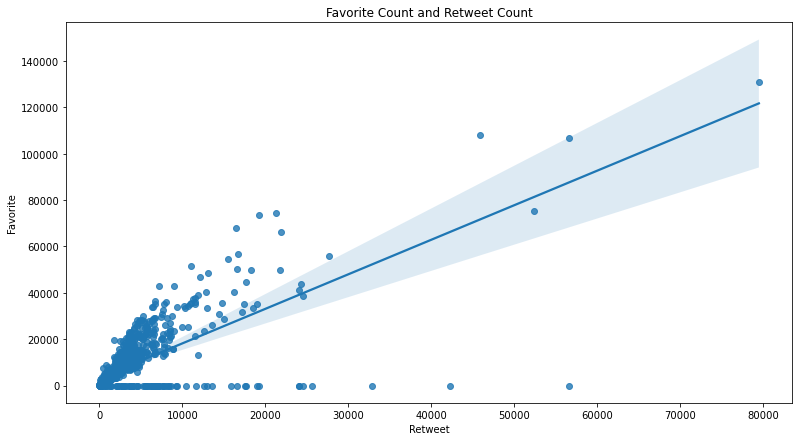

In [239]:
plt.figure(figsize=(13,7))
sns.regplot(x=df_all_copy.retweet_count, y=df_all_copy.favorite_count)
plt.title("Favorite Count and Retweet Count")
plt.xlabel('Retweet')
plt.ylabel('Favorite');

### Visualization
##### Comparison between various sources of data in a Pie Chart

Text(0, 0.5, '')

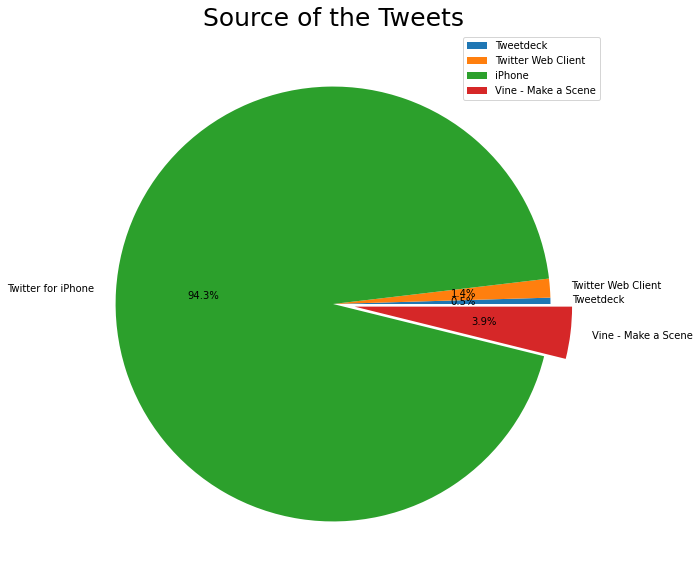

In [257]:
sources = df_all_copy.groupby('source').count()[['tweet_id']]
sources.rename(columns={'tweet_id': 'count_tweet'}, inplace=True)
sources['percentage'] = sources.count_tweet / sources.count_tweet.sum() * 100
sources['percentage'].plot.pie(figsize=(12,10), autopct='%1.1f%%',
        explode=(0,0,0,0.1))
plt.title("Source of the Tweets", {'fontsize': 25})
plt.legend(["Tweetdeck", "Twitter Web Client", "iPhone", "Vine - Make a Scene"] )
plt.ylabel("")

## Resources

1. DataFrame Merge: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

2. Graph Correlation: https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-scatterplots/a/scatterplots-and-correlation-review

3. Multiple Column Merge: https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

4. Select specific Rows: http://net-informations.com/ds/pd/rows.htm

5. Requests: https://pypi.org/project/requests/

6. Udacity Classroom: ALX-T Data Analyst